### Task 1: Data Preprocessing (15 minutes)

- Load and inspect the dataset.
- Perform data cleaning and preparation.
 - Handling missing values
 - Encoding categorical variables
 - Normalizing numerical features

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

The Titanic dataset is a classic and well-documented dataset that is often used for teaching data analysis and machine learning techniques. It contains information about the passengers who were aboard the Titanic, including attributes such as age, gender, class, and whether they survived.

Descriptions of the Titantic dataset columns can be found on the Kaggle webpage for the dataset: https://www.kaggle.com/competitions/titanic/data

In [3]:
# Load the dataset
df = pd.read_csv("titantic.csv")

In [4]:
# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [5]:
# Drop columns that won't be used for clustering
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [8]:
# Normalize numerical features
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [14]:
# Check for any remaining missing values or infinities
print(df.isnull().sum())
print(df.describe())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587    0.367921   
std     257.353842    0.486592    0.836071    0.477990    0.163383   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.271174   
50%     446.000000    0.000000    3.000000    1.000000    0.367921   
75%     668.500000    1.000000    3.000000    1.000000    0.434531   
max     891.000000    1.000000    3.000000    1.000000    1.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594    0.062858    1.538721  
std      1.102743    0.806057    0.

In [9]:
# Display the cleaned dataset
print(df.head())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1  0.271174      1      0  0.014151   
1            2         1       1    0  0.472229      1      0  0.139136   
2            3         1       3    0  0.321438      0      0  0.015469   
3            4         1       1    0  0.434531      1      0  0.103644   
4            5         0       3    1  0.434531      0      0  0.015713   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


### Task 2: Clustering (20 minutes)

- Apply K-Means clustering to the dataset.
- Visualize the clusters.

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Select features for clustering
features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

In [36]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

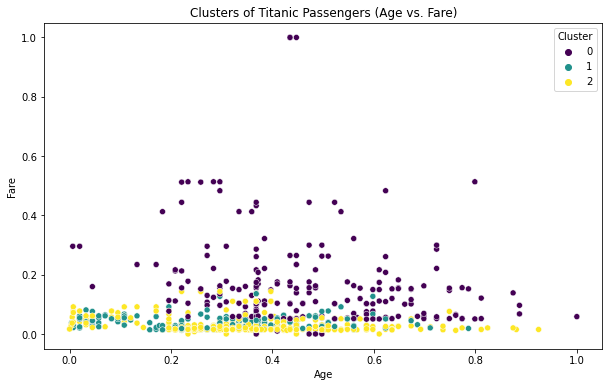

In [32]:
# Visualize the clusters using a scatter plot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Titanic Passengers (Age vs. Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster')
plt.show()

After clustering, group the data by the cluster labels and calculate the mean of each feature for each cluster. This helps us understand the average characteristics of passengers within each cluster.
The cluster_means DataFrame shows these average values, which can be used to describe the typical passenger in each cluster.

In [33]:
# Describe the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         PassengerId  Survived    Pclass       Sex       Age     SibSp  \
Cluster                                                                  
0         461.597222  0.629630  1.000000  0.564815  0.460268  0.416667   
1         414.713636  0.645455  2.654545  0.000000  0.317483  0.754545   
2         453.723077  0.140659  2.762637  1.000000  0.348468  0.461538   

            Parch      Fare  Embarked  
Cluster                                
0        0.356481  0.164259  1.212963  
1        0.731818  0.035407  1.568182  
2        0.224176  0.027994  1.679121  


The following code creates box plots for each feature, segmented by cluster. This provides a visual representation of the distribution of features within each cluster, making it easier to identify differences and similarities among the clusters.

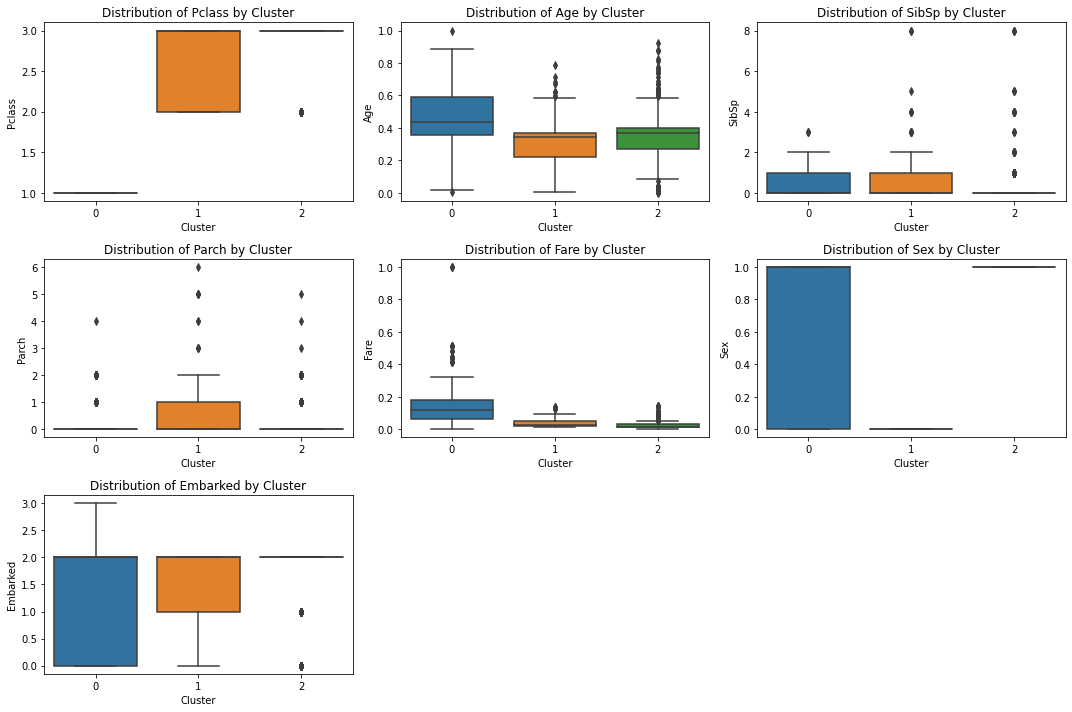

In [37]:
# Visualize the distribution of features within each cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()

### Task 3: Discussion and Interpretation (15 minutes)

- Analyze the clusters and discuss patterns and insights.
- Reflect on how these clusters could inform decision-making or further analysis.
- Consider what other data mining techniques could be applied to the Titanic dataset.

#### Discussion Points:

- What characteristics define each cluster?
- How do the clusters relate to survival rates?
- What additional data or features might improve the clustering results?

#### Example Interpretation

Based on the cluster_means output and the box plots, you could interpret the clusters as follows:

- Cluster 0: May represent a group with higher 'Fare' values and a different distribution of ages compared to other clusters.
- Cluster 1: Could consist of passengers with lower 'Pclass' and lower 'Fare', possibly indicating lower socioeconomic status.
- Cluster 2: Might include passengers with a specific range of ages or family sizes (e.g., 'SibSp' and 'Parch').